In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

try:
    print("Loading dataset...")
    # Correct path to the creditcard.csv file
    data = pd.read_csv('/Users/aayush2/Downloads/creditcard.csv')
    print("Dataset loaded")

    print("Inspecting the dataset...")
    print(data.head())
    print(data.columns)

    # Check if expected columns exist
    if 'Time' in data.columns and 'Amount' in data.columns:
        print("Starting data preprocessing...")

        # Feature engineering
        data['transaction_hour'] = data['Time'] // 3600 % 24
        data['transaction_day'] = data['Time'] // (3600 * 24) % 7
        data['transaction_month'] = data['Time'] // (3600 * 24 * 30) % 12

        # One-Hot Encoding for categorical features
        # Assuming 'merchant_type' and 'transaction_type' need to be created or exist in the dataset
        # data = pd.get_dummies(data, columns=['merchant_type', 'transaction_type'])

        # Selecting relevant features
        features = ['Amount', 'transaction_hour', 'transaction_day', 'transaction_month']
        X = data[features]
        y = data['Class']  # Assuming 'Class' is the label for fraud

        print("Standardizing features...")
        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        print("Handling imbalanced data...")
        # Handle imbalanced data
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_scaled, y)

        print("Splitting data...")
        # Split data
        X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        print("Data preprocessing completed.")
    else:
        print("Expected columns 'Time' and 'Amount' not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Loading dataset...
Dataset loaded
Inspecting the dataset...
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137

Loading dataset...
Dataset loaded
Inspecting the dataset...
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137

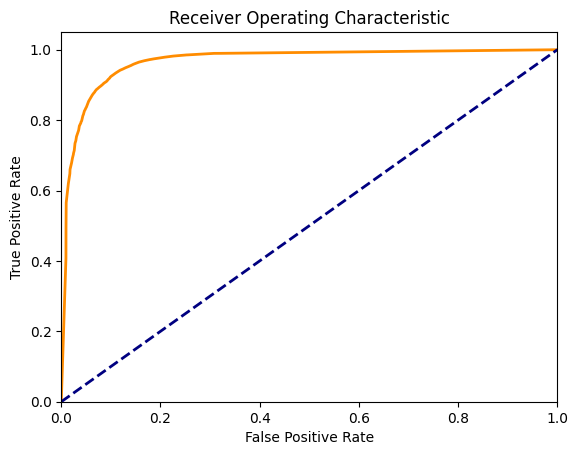

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

try:
    print("Loading dataset...")
    # Correct path to the creditcard.csv file
    data = pd.read_csv('/Users/aayush2/Downloads/creditcard.csv')
    print("Dataset loaded")

    print("Inspecting the dataset...")
    print(data.head())
    print(data.columns)

    # Check if expected columns exist
    if 'Time' in data.columns and 'Amount' in data.columns:
        print("Starting data preprocessing...")

        # Feature engineering
        data['transaction_hour'] = data['Time'] // 3600 % 24
        data['transaction_day'] = data['Time'] // (3600 * 24) % 7
        data['transaction_month'] = data['Time'] // (3600 * 24 * 30) % 12

        # Selecting relevant features
        features = ['Amount', 'transaction_hour', 'transaction_day', 'transaction_month']
        X = data[features]
        y = data['Class']  # Assuming 'Class' is the label for fraud

        print("Standardizing features...")
        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        print("Handling imbalanced data...")
        # Handle imbalanced data
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_scaled, y)

        print("Splitting data...")
        # Split data
        X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        print("Data preprocessing completed.")

        # Model training
        print("Training the model...")
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        print("Model trained")

        # Model evaluation
        print("Evaluating the model...")
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print('ROC-AUC:', roc_auc_score(y_test, y_pred_proba))

        # Confusion Matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.show()

    else:
        print("Expected columns 'Time' and 'Amount' not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Hyperparameters:", grid_search.best_params_)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))
print('ROC-AUC for Best Model:', roc_auc_score(y_test, y_pred_proba))


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     42464
           1       0.92      0.91      0.91     42831

    accuracy                           0.91     85295
   macro avg       0.91      0.91      0.91     85295
weighted avg       0.91      0.91      0.91     85295

ROC-AUC for Best Model: 0.9757559369127753


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Define models to compare
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Compare models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"{name} - ROC-AUC: {roc_auc_score(y_test, y_pred_proba)}")
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))


RandomForest - ROC-AUC: 0.9663173032237052
RandomForest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     42464
           1       0.91      0.90      0.91     42831

    accuracy                           0.91     85295
   macro avg       0.91      0.91      0.91     85295
weighted avg       0.91      0.91      0.91     85295

LogisticRegression - ROC-AUC: 0.6248053814318193
LogisticRegression - Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.60      0.60     42464
           1       0.60      0.59      0.59     42831

    accuracy                           0.60     85295
   macro avg       0.60      0.60      0.60     85295
weighted avg       0.60      0.60      0.60     85295

GradientBoosting - ROC-AUC: 0.8757558367904723
GradientBoosting - Classification Report:
              precision    recall  f1-score   support

           0       0.78     

             Feature  Importance
0             Amount    0.522374
1   transaction_hour    0.453019
2    transaction_day    0.024607
3  transaction_month    0.000000


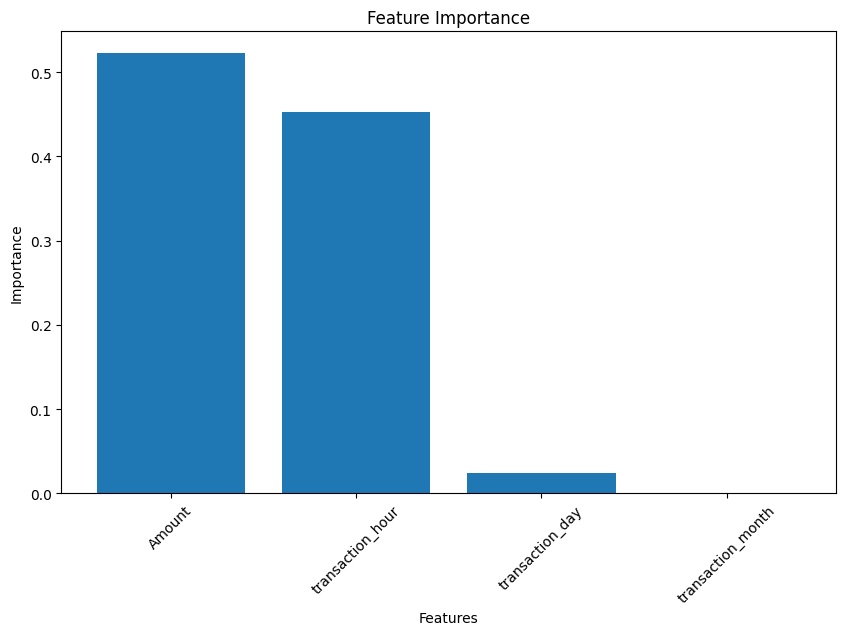

In [5]:
# Feature importance for RandomForest
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()
